In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use('../glfharris.mplstyle')

# TCI Models

<center>
<img src="img/multi-compartment.svg">
</center>

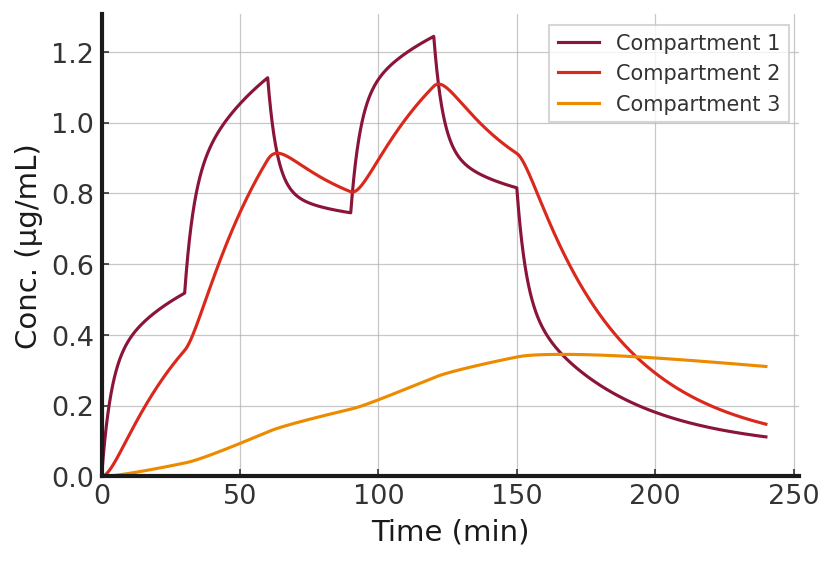

In [6]:
weight = 70.0

# Define the parameters of the Marsh model
V1 = 0.228 * weight # volume of the first compartment (L)
V2 = 0.463 * weight # volume of the second compartment (L)
V3 = 2.893 * weight # volume of the third compartment (L)
k10 = 0.119
k12 = 0.112 # transfer rate constant from first to second compartment
k13 = 0.042
k21 = 0.055 # transfer rate constant from second to first compartment
k31 = 0.0033
keo = 0.26

# Define the initial concentrations of propofol in the compartments
C1_0 = 0.0
C2_0 = 0.0
C3_0 = 0.0

# Define the time points at which the concentrations will be computed
t = np.linspace(0, 240,240 * 60)

# Define the function that describes the Marsh model
def marsh(C, t, V1, V2, V3, k10, k12, k13, k21, k31, keo):
    C1, C2, C3 = C
    dC1dt = ((k21*C2*V2 + k31*C3*V3) - (k10*C1*V1 + k12*C1*V1 + k13*C1*V1 )) / V1
    dC2dt = (k12*C1*V1 - k21*C2*V2) / V2
    dC3dt = (k13*C1*V1 - k31*C3*V3) / V3
    
    
    if 0 < t < 30:
        dC1dt += (100 / 60) / V1
        
    if 30 < t < 60:
        dC1dt += (200 / 60) / V1
        
    if 60 < t < 90:
        dC1dt += (100 / 60) / V1
        
    if 90 < t < 120:
        dC1dt += (200 / 60) / V1
        
    if 120 < t < 150:
        dC1dt += (100 / 60) / V1
        
    return [dC1dt, dC2dt, dC3dt]

# Solve the differential equations using odeint
C = odeint(marsh, [C1_0, C2_0, C3_0], t, args=(V1, V2, V3, k10, k12, k13, k21, k31, keo))
C1, C2, C3 = C.T

# Plot the concentration of propofol in the two compartments over time
plt.plot(t, C1, label='Compartment 1')
plt.plot(t, C2, label='Compartment 2')
plt.plot(t, C3, label='Compartment 3')
plt.xlabel('Time (min)')
plt.xlim([0,None])
plt.ylabel('Conc. (µg/mL)')
plt.ylim([0,None])
plt.legend()
plt.show()

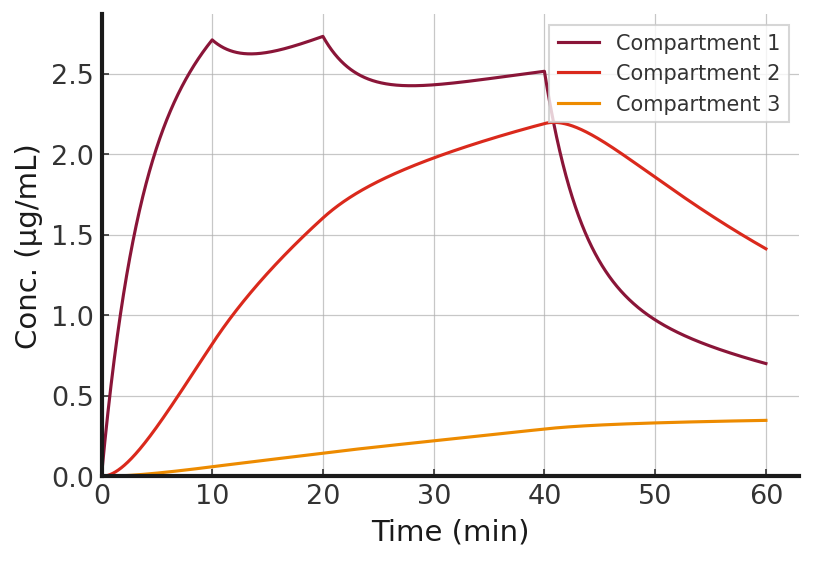

In [7]:
weight = 70

# Define the parameters of the Marsh model
V1 = 0.228 * weight # volume of the first compartment (L)
V2 = 0.463 * weight # volume of the second compartment (L)
V3 = 2.893 * weight # volume of the third compartment (L)
k10 = 0.119
k12 = 0.112 # transfer rate constant from first to second compartment
k13 = 0.042
k21 = 0.055 # transfer rate constant from second to first compartment
k31 = 0.0033
keo = 0.26

# Define the initial concentrations of propofol in the compartments
C1 = 0.0
C2 = 0.0
C3 = 0.0

duration = 60 # minutes

t = np.linspace(0, 60, duration*60) # *60 to get calculations per second.

C1_results = []
C2_results = []
C3_results = []
inf_rates = []

for x in t:
    if x < 10:
        infusion_rate = (10 * weight) / 60 # Turns mg/hr into mg/minute
    if 10 < x < 20:
        infusion_rate = (8 * weight) / 60
    if 20 < x < 30:
        infusion_rate = (6 * weight) / 60
    if x > 40:
        infusion_rate = 0
    
    dC1dt = ((k21*C2*V2 + k31*C3*V3) - (k10*C1*V1 + k12*C1*V1 + k13*C1*V1 )) / V1
    dC2dt = (k12*C1*V1 - k21*C2*V2) / V2
    dC3dt = (k13*C1*V1 - k31*C3*V3) / V3

    C1 += (dC1dt + (infusion_rate / V1)) / 60
    C2 += (dC2dt / 60)
    C3 += (dC3dt / 60)
    
    C1_results.append(C1)
    C2_results.append(C2)
    C3_results.append(C3)
    inf_rates.append(infusion_rate)

plt.plot(t, C1_results, label='Compartment 1')
plt.plot(t, C2_results, label='Compartment 2')
plt.plot(t, C3_results, label='Compartment 3')
# plt.plot(t, inf_rates, label='Infusion Rate mg/min')
plt.xlabel('Time (min)')
plt.xlim([0,None])
plt.ylabel('Conc. (µg/mL)')
plt.ylim([0,None])
plt.legend()
plt.show()

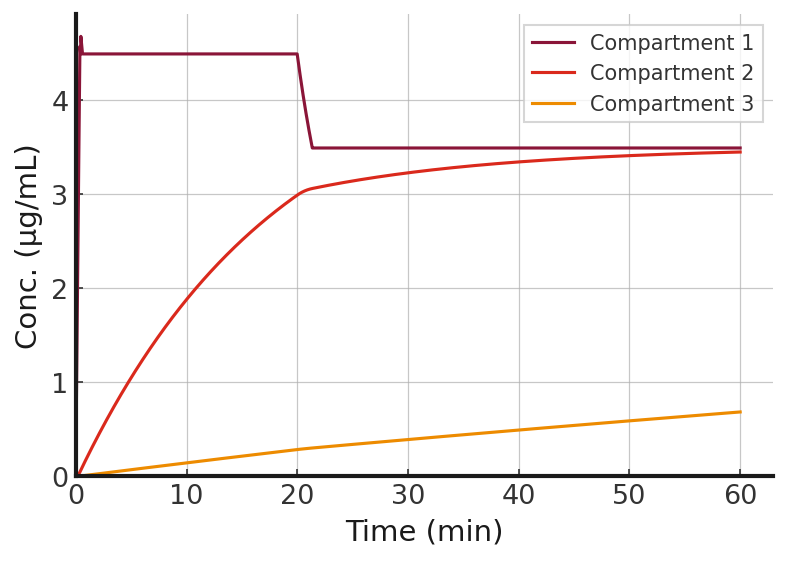

In [8]:
weight = 70

# Define the parameters of the Marsh model
V1 = 0.228 * weight # volume of the first compartment (L)
V2 = 0.463 * weight # volume of the second compartment (L)
V3 = 2.893 * weight # volume of the third compartment (L)
k10 = 0.119
k12 = 0.112 # transfer rate constant from first to second compartment
k13 = 0.042
k21 = 0.055 # transfer rate constant from second to first compartment
k31 = 0.0033
keo = 0.26

# Define the initial concentrations of propofol in the compartments
C1 = 0
C2 = 0.0
C3 = 0.0

duration = 60 # minutes

t = np.linspace(0, 60, duration*60) # *60 to get calculations per second.

C1_results = []
C2_results = []
C3_results = []
inf_rates = []

target = 4.5

infusion_rate = 0

for x in t:
    
    if x > 20:
        target = 3.5
    
    dC1dt = ((k21*C2*V2 + k31*C3*V3) - (k10*C1*V1 + k12*C1*V1 + k13*C1*V1 )) / V1
    dC2dt = (k12*C1*V1 - k21*C2*V2) / V2
    dC3dt = (k13*C1*V1 - k31*C3*V3) / V3
    
    if x < 0.5 and C1 < target:
        infusion_rate = 200
    else:
        infusion_rate = 0
    
    if x > 0.5:
        if C1 < target - 0.2:
            infusion_rate = 20

        elif C1 < target:
            if dC1dt < 0:
                infusion_rate = abs(dC1dt) * V1
        elif C1 > target:
            infusion_rate = 0

    C1 += (dC1dt + (infusion_rate / V1)) / 60
    C2 += (dC2dt / 60)
    C3 += (dC3dt / 60)
    
    C1_results.append(C1)
    C2_results.append(C2)
    C3_results.append(C3)
    inf_rates.append(infusion_rate)

plt.plot(t, C1_results, label='Compartment 1')
plt.plot(t, C2_results, label='Compartment 2')
plt.plot(t, C3_results, label='Compartment 3')
#plt.plot(t, inf_rates, label='Req. Infusion Rate mg/min')
plt.xlabel('Time (min)')
plt.xlim([0,None])
plt.ylabel('Conc. (µg/mL)')
plt.ylim([0,None])
plt.legend()
plt.show()

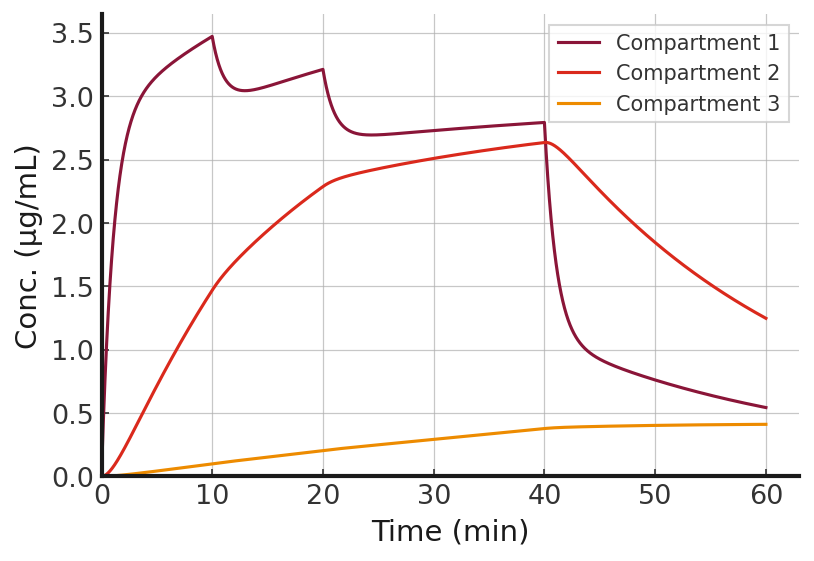

In [9]:
### SCHNIDER

weight = 70
height = 175
age = 50

lbm = 1.1 * weight - 129 * (weight / height)**2 # In males

# Define the parameters of the Schnider model
V1 = 4.27 # volume of the first compartment (L)
V2 = 18.9 - 0.391 * (age - 53) # volume of the second compartment (L)
V3 = 238 # volume of the third compartment (L)
k10 = 0.443 + 0.0107 * (weight - 77) - 0.0159 * (lbm - 59) + 0.0063 * (height - 177)
k12 = 0.302 - 0.0056 * (age - 53)
k13 = 0.196
k21 = (1.29-0.024*(age-53)) / (18.9 - 0.391*(age-53))
k31 = 0.0035
keo = 0.456

# Define the initial concentrations of propofol in the compartments
C1 = 0.0
C2 = 0.0
C3 = 0.0

duration = 60 # minutes

t = np.linspace(0, 60, duration*60) # *60 to get calculations per second.

C1_results = []
C2_results = []
C3_results = []
inf_rates = []

for x in t:
    if x < 10:
        infusion_rate = (10 * weight) / 60 # Turns mg/hr into mg/minute
    if 10 < x < 20:
        infusion_rate = (8 * weight) / 60
    if 20 < x < 30:
        infusion_rate = (6 * weight) / 60
    if x > 40:
        infusion_rate = 0
    
    dC1dt = ((k21*C2*V2 + k31*C3*V3) - (k10*C1*V1 + k12*C1*V1 + k13*C1*V1 )) / V1
    dC2dt = (k12*C1*V1 - k21*C2*V2) / V2
    dC3dt = (k13*C1*V1 - k31*C3*V3) / V3

    C1 += (dC1dt + (infusion_rate / V1)) / 60
    C2 += (dC2dt / 60)
    C3 += (dC3dt / 60)
    
    C1_results.append(C1)
    C2_results.append(C2)
    C3_results.append(C3)
    inf_rates.append(infusion_rate)

plt.plot(t, C1_results, label='Compartment 1')
plt.plot(t, C2_results, label='Compartment 2')
plt.plot(t, C3_results, label='Compartment 3')
#plt.plot(t, inf_rates, label='Infusion Rate mg/min')
plt.xlabel('Time (min)')
plt.xlim([0,None])
plt.ylabel('Conc. (µg/mL)')
plt.ylim([0,None])
plt.legend()
plt.show()